In [117]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
class MohamedNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.1), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.5), requires_grad=False)

        self.w01 = nn.Parameter(torch.tensor(0.6), requires_grad=False)
        self.b01 = nn.Parameter(torch.tensor(-1.5), requires_grad=False)

        self.w02 = nn.Parameter(torch.tensor(0.5), requires_grad=False)
        self.b02 = nn.Parameter(torch.tensor(0.65), requires_grad=False)

        self.w11 = nn.Parameter(torch.tensor(1.55), requires_grad=False)
        self.w12 = nn.Parameter(torch.tensor(-0.7), requires_grad=False)
        self.w13 = nn.Parameter(torch.tensor(1.22), requires_grad=False)

        self.w20 = nn.Parameter(torch.tensor(1.6), requires_grad=False)

    def forward(self, input):
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = F.relu(input_to_layer_01)
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = F.relu(input_to_layer_02)
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = F.relu(input_to_layer_03)
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = F.tanh(output)
        output = output * self.w20
        return output





In [119]:
my_model = MohamedNN()

In [120]:
X = torch.linspace(start=1, end=2.5, steps=40)
X

tensor([1.0000, 1.0385, 1.0769, 1.1154, 1.1538, 1.1923, 1.2308, 1.2692, 1.3077,
        1.3462, 1.3846, 1.4231, 1.4615, 1.5000, 1.5385, 1.5769, 1.6154, 1.6538,
        1.6923, 1.7308, 1.7692, 1.8077, 1.8462, 1.8846, 1.9231, 1.9615, 2.0000,
        2.0385, 2.0769, 2.1154, 2.1538, 2.1923, 2.2308, 2.2692, 2.3077, 2.3462,
        2.3846, 2.4231, 2.4615, 2.5000])

In [121]:
Y = my_model(X)
Y

tensor([1.5702, 1.5750, 1.5790, 1.5824, 1.5853, 1.5877, 1.5897, 1.5914, 1.5928,
        1.5939, 1.5949, 1.5958, 1.5965, 1.5970, 1.5975, 1.5979, 1.5983, 1.5985,
        1.5988, 1.5990, 1.5991, 1.5993, 1.5994, 1.5995, 1.5996, 1.5996, 1.5997,
        1.5998, 1.5998, 1.5998, 1.5999, 1.5999, 1.5999, 1.5999, 1.5999, 1.5999,
        1.6000, 1.6000, 1.6000, 1.6000])

Text(0, 0.5, 'Y')

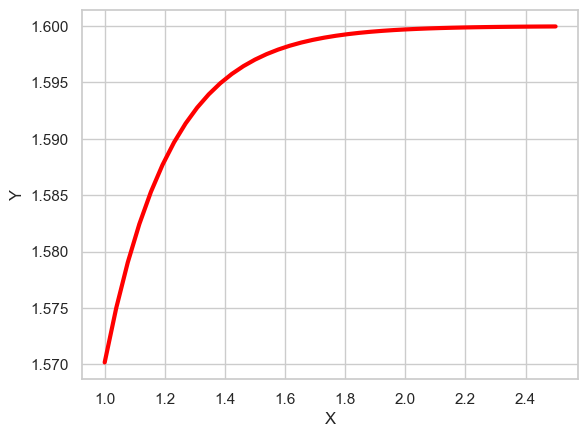

In [122]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=Y,
    color='red',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')

In [123]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.rand((40)), requires_grad=True)   
        self.b00 = nn.Parameter(torch.rand((40)), requires_grad=False)

        self.w01 = nn.Parameter(torch.rand((40)), requires_grad=False)
        self.b01 = nn.Parameter(torch.rand((40)), requires_grad=False)

        self.w02 = nn.Parameter(torch.rand((40)), requires_grad=True)
        self.b02 = nn.Parameter(torch.rand((40)), requires_grad=False)

        self.w11 = nn.Parameter(torch.rand((40)), requires_grad=False)
        self.w12 = nn.Parameter(torch.rand((40)), requires_grad=False)
        self.w13 = nn.Parameter(torch.rand((40)), requires_grad=False)

        self.w20 = nn.Parameter(torch.rand((40)), requires_grad=True)

    def forward(self, input):
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = F.sigmoid(input_to_layer_01)
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = F.sigmoid(input_to_layer_02)
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = F.sigmoid(input_to_layer_03)
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = F.tanh(output)
        output = output * self.w20
        return output

In [124]:
model= NeuralNetwork()
input = torch.linspace(start=1, end=2.5, steps=40)
output = model(input)
output

tensor([0.3138, 0.3547, 0.7312, 0.7573, 0.0481, 0.1438, 0.1596, 0.2729, 0.0832,
        0.1727, 0.3730, 0.4565, 0.3862, 0.5556, 0.8681, 0.0680, 0.1833, 0.7927,
        0.8633, 0.2167, 0.4094, 0.2439, 0.7237, 0.6131, 0.2324, 0.7094, 0.1911,
        0.0931, 0.4657, 0.2326, 0.5466, 0.7936, 0.7827, 0.0703, 0.5700, 0.9570,
        0.4679, 0.0927, 0.1087, 0.6342], grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

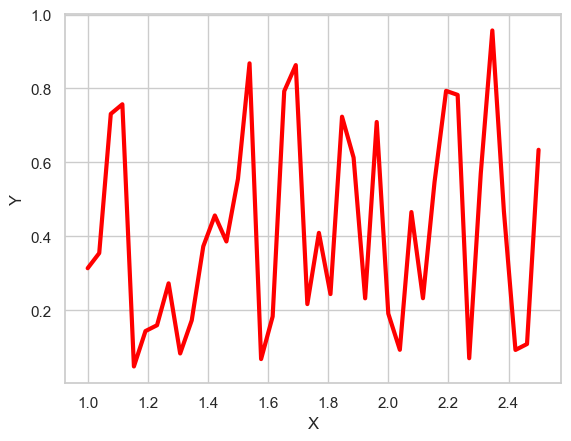

In [125]:
sns.set(style="whitegrid")

sns.lineplot(
    x=input,
    y=output.detach(),
    color='red',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')

In [126]:
optimizer = SGD(model.parameters(), lr=0.1)
loss = nn.MSELoss()

In [127]:
for epoch in range(100):
    total_loss = 0

    for i in range(len(X)):
        input_i = X[i]
        actual_output_i = Y[i]

        pred_output_i = model(input_i)

        loss_value = loss(pred_output_i, actual_output_i)

        loss_value.backward()

        total_loss += loss_value

    print('Epoch: ', epoch, ' | Total Loss: ', total_loss)
    optimizer.step()
    optimizer.zero_grad()



c:\Users\minef\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([40])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  0  | Total Loss:  tensor(58.3495, grad_fn=<AddBackward0>)
Epoch:  1  | Total Loss:  tensor(45.4130, grad_fn=<AddBackward0>)
Epoch:  2  | Total Loss:  tensor(35.6617, grad_fn=<AddBackward0>)
Epoch:  3  | Total Loss:  tensor(28.2600, grad_fn=<AddBackward0>)
Epoch:  4  | Total Loss:  tensor(22.6030, grad_fn=<AddBackward0>)
Epoch:  5  | Total Loss:  tensor(18.2492, grad_fn=<AddBackward0>)
Epoch:  6  | Total Loss:  tensor(14.8744, grad_fn=<AddBackward0>)
Epoch:  7  | Total Loss:  tensor(12.2392, grad_fn=<AddBackward0>)
Epoch:  8  | Total Loss:  tensor(10.1658, grad_fn=<AddBackward0>)
Epoch:  9  | Total Loss:  tensor(8.5215, grad_fn=<AddBackward0>)
Epoch:  10  | Total Loss:  tensor(7.2069, grad_fn=<AddBackward0>)
Epoch:  11  | Total Loss:  tensor(6.1473, grad_fn=<AddBackward0>)
Epoch:  12  | Total Loss:  tensor(5.2859, grad_fn=<AddBackward0>)
Epoch:  13  | Total Loss:  tensor(4.5798, grad_fn=<AddBackward0>)
Epoch:  14  | Total Loss:  tensor(3.9961, grad_fn=<AddBackward0>)
Epoch:  15 

In [128]:
pred_y = model(X)
pred_y

tensor([1.5218, 1.5636, 1.5719, 1.5550, 1.5607, 1.5758, 1.5708, 1.5853, 1.5459,
        1.5589, 1.5808, 1.5705, 1.5683, 1.5665, 1.5847, 1.5721, 1.5880, 1.5941,
        1.5951, 1.5978, 1.5986, 1.5587, 1.6040, 1.6124, 1.6019, 1.6178, 1.6081,
        1.6118, 1.6352, 1.6323, 1.6191, 1.6039, 1.6187, 1.6307, 1.6138, 1.6097,
        1.6386, 1.6235, 1.6227, 1.6113], grad_fn=<MulBackward0>)

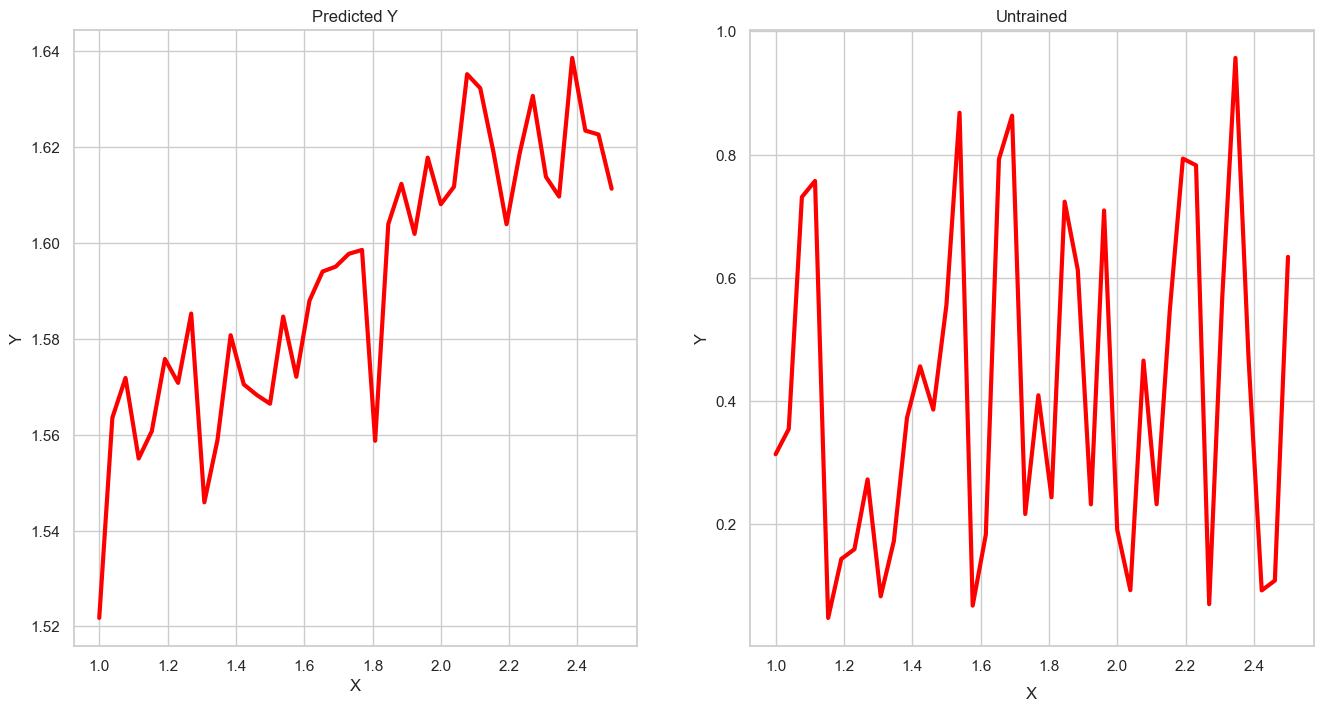

In [129]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=pred_y.detach(),
    color='red',
    linewidth=3,
    ax=axes[0]
)
axes[0].set_title('Predicted Y')

sns.lineplot(
    x=X,
    y=output.detach(),
    color='red',
    linewidth=3,
    ax=axes[1]
)
axes[1].set_title('Untrained')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[0].set_title('Predicted Y')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
plt.xlabel('X', labelpad=10,axes=axes[0])

plt.show()